In [1]:
#Edgar Moises Hernandez-Gonzalez
#08/07/19-04/11/19
#CNN-1D + LSTM
#Esta es la arquitectura final

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [2]:
datos = pd.read_csv("Submuestreo01.csv", header=None)
x = datos.iloc[:, 0:3072].values
y = datos.iloc[:, 3072].values

num_classes = 6
n_samples = len(y)
print(x.shape)
print(y.shape)
print(n_samples)

(132, 3072)
(132,)
132


In [3]:
#escalar los datos para que tengan media = 0 y desviacion estandar = 1
scaler = StandardScaler().fit(x)
x = scaler.transform(x)

In [4]:
#convertir de 2D a 4D
x = x.reshape((n_samples, 1, 512, 6))
print(x.shape)

(132, 1, 512, 6)


In [5]:
#dividir en train y test
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [6]:
model = models.Sequential()
model.add(layers.TimeDistributed(layers.Conv1D(filters=64, kernel_size=3, activation='relu'), input_shape=(None,512,6)))
model.add(layers.TimeDistributed(layers.Conv1D(filters=64, kernel_size=3, activation='relu')))
model.add(layers.TimeDistributed(layers.Dropout(0.5)))
model.add(layers.TimeDistributed(layers.MaxPooling1D(pool_size=2)))
model.add(layers.TimeDistributed(layers.Flatten()))
model.add(layers.LSTM(100))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed (TimeDistri (None, None, 510, 64)     1216      
_________________________________________________________________
time_distributed_1 (TimeDist (None, None, 508, 64)     12352     
_________________________________________________________________
time_distributed_2 (TimeDist (None, None, 508, 64)     0         
_________________________________________________________________
time_distributed_3 (TimeDist (None, None, 254, 64)     0         
_________________________________________________________________
time_distributed_4 (TimeDist (None, None, 16256)       0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               6542800   
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
__________

In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
history = model.fit(x_train, y_train, epochs = 20, batch_size = 64, validation_data=(x_test, y_test))

Train on 99 samples, validate on 33 samples
Epoch 1/20
99/99 [==============================] - 6s 63ms/sample - loss: 1.7745 - acc: 0.1717 - val_loss: 2.0426 - val_acc: 0.0303
Epoch 2/20
99/99 [==============================] - 0s 2ms/sample - loss: 1.7982 - acc: 0.2323 - val_loss: 1.9003 - val_acc: 0.0303
Epoch 3/20
99/99 [==============================] - 0s 2ms/sample - loss: 1.7169 - acc: 0.2020 - val_loss: 1.8895 - val_acc: 0.1515
Epoch 4/20
99/99 [==============================] - 0s 2ms/sample - loss: 1.6813 - acc: 0.3333 - val_loss: 1.8955 - val_acc: 0.0909
Epoch 5/20
99/99 [==============================] - 0s 2ms/sample - loss: 1.6311 - acc: 0.3737 - val_loss: 1.8931 - val_acc: 0.1515
Epoch 6/20
99/99 [==============================] - 0s 2ms/sample - loss: 1.5957 - acc: 0.3636 - val_loss: 1.8551 - val_acc: 0.1212
Epoch 7/20
99/99 [==============================] - 0s 2ms/sample - loss: 1.5235 - acc: 0.4242 - val_loss: 1.8619 - val_acc: 0.1818
Epoch 8/20
99/99 [=============

In [10]:
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

33/33 [==============================] - 0s 2ms/sample - loss: 2.1912 - acc: 0.0909
Test loss: 2.1911927497748174
Test accuracy: 0.09090909


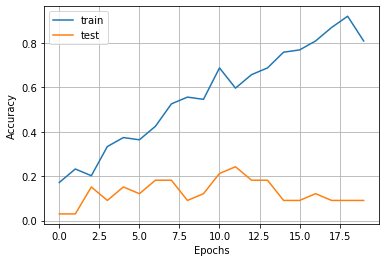

In [11]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])
plt.show()

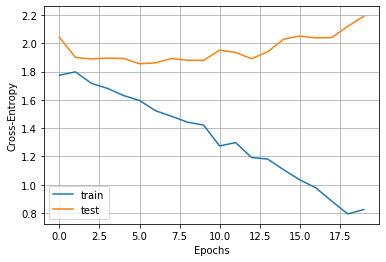

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend(['train', 'test'])
plt.show()